In [33]:
dir()

[1] "R_monocle.ipynb"                        
[2] "Untitled.ipynb"                         
[3] "pbmc8k_filtered_gene_bc_matrices.tar.gz"

In [5]:
library(monocle)

Loading required package: Matrix
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colMeans, colSums, colnames,
    dirname, do.call, duplicated, eval, evalq, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, rank, rbind,
    rowMeans, rowS

In [10]:
packageVersion('monocle')

[1] ‘2.8.0’

[10Xの公式](http://cf.10xgenomics.com)からデータをダウンロードする。

In [34]:
download.file("http://cf.10xgenomics.com/samples/cell-exp/2.0.1/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz", "pbmc8k_filtered_gene_bc_matrices.tar.gz")

In [35]:
dir()

[1] "R_monocle.ipynb"                        
[2] "Untitled.ipynb"                         
[3] "pbmc8k_filtered_gene_bc_matrices.tar.gz"

In [36]:
untar("pbmc8k_filtered_gene_bc_matrices.tar.gz")

In [37]:
dir()

[1] "R_monocle.ipynb"                        
[2] "Untitled.ipynb"                         
[3] "filtered_gene_bc_matrices"              
[4] "pbmc8k_filtered_gene_bc_matrices.tar.gz"

### cellranger Rkit packageを導入

In [16]:
source("http://cf.10xgenomics.com/supp/cell-exp/rkit-install-2.0.0.R")


Cell Ranger R Kit Installer
Copyright (c) 2016 10x Genomics, Inc. All rights reserved.
----------------------------------------------------------


By continuing, you are agreeing to the EULA at: http://support.10xgenomics.com/license
[ hit enter to continue ]



Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.0 (2018-04-23).
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.0 (2018-04-23).
Installing package(s) ‘rhdf5’
Installing package into ‘/home/kimoton/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/kimoton/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/kimoton/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/kimoton/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/kimoton/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/kimoton/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/kimoton/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is u

In [23]:
library(cellrangerRkit)


Loading required package: RColorBrewer
Loading required package: bit64
Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:base’:

    xor

Attaching package bit64
package:bit64 (c) 2011-2012 Jens Oehlschlaegel
creators: integer64 seq :
coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bin
logical operator: ! & | xor != == < <= >= >
arithmetic operator: + - * / %/% %% ^
math: sign abs sqrt log log2 log10
math: floor ceiling trunc round
querying: is.integer64 is.vector [is.atomic} [length] format print str
values: is.na is.nan is.finite is.infinite
aggregation: any all min max range sum prod
cumulation: diff cummin 

出力ディレクトリの作成と、入力データの移行

In [41]:
system('mv filtered_gene_bc_matrices outs', intern=TRUE)

character(0)

In [42]:
dir()

[1] "R_monocle.ipynb"                        
[2] "Untitled.ipynb"                         
[3] "outs"                                   
[4] "pbmc8k_filtered_gene_bc_matrices.tar.gz"

In [43]:
data.dir <- "."

gbm <- load_cellranger_matrix(data.dir)

Searching for genomes in: ./outs/filtered_gene_bc_matrices 
Using GRCh38 in folder: ./outs/filtered_gene_bc_matrices/GRCh38 
Loaded matrix information
Loaded gene information
Loaded barcode information
Could not find summary csv: 
	 ./outs/metrics_summary.csv.
This file is only necessary if you are performing depth-normalization (calling the equalize_gbms function) in R.
If this pipestance was produced by `cellranger aggr` with the default parameters, depth-normalization in R (via equalize_gbms) is not necessary.


In [44]:
class(gbm)

[1] "GeneBCMatrix"
attr(,"package")
[1] "cellrangerRkit"

遺伝子数、細胞数を見るには、`dim`を使う。

In [45]:
dim(exprs(gbm))

[1] 33694  8381

In [46]:
exprs(gbm)[1:5, 1:5]

5 x 5 sparse Matrix of class "dgTMatrix"
                AAACCTGAGCATCATC-1 AAACCTGAGCTAACTC-1 AAACCTGAGCTAGTGG-1
ENSG00000243485                  .                  .                  .
ENSG00000237613                  .                  .                  .
ENSG00000186092                  .                  .                  .
ENSG00000238009                  .                  .                  .
ENSG00000239945                  .                  .                  .
                AAACCTGCACATTAGC-1 AAACCTGCACTGTTAG-1
ENSG00000243485                  .                  .
ENSG00000237613                  .                  .
ENSG00000186092                  .                  .
ENSG00000238009                  .                  .
ENSG00000239945                  .                  .

オブジェクト作成直後はphenotyoe Data(pData)は1つ（barcode）しか持たない。

In [51]:
dim(pData(gbm))

[1] 8381    1

In [52]:
head(pData(gbm))

,barcode
AAACCTGAGCATCATC-1,AAACCTGAGCATCATC-1
AAACCTGAGCTAACTC-1,AAACCTGAGCTAACTC-1
AAACCTGAGCTAGTGG-1,AAACCTGAGCTAGTGG-1
AAACCTGCACATTAGC-1,AAACCTGCACATTAGC-1
AAACCTGCACTGTTAG-1,AAACCTGCACTGTTAG-1
AAACCTGCATAGTAAG-1,AAACCTGCATAGTAAG-1


fData(feature information) は2つ持つ。

In [57]:
dim(fData(gbm))

[1] 33694     2

In [58]:
head(fData(gbm))

,id,symbol
ENSG00000243485,ENSG00000243485,RP11-34P13.3
ENSG00000237613,ENSG00000237613,FAM138A
ENSG00000186092,ENSG00000186092,OR4F5
ENSG00000238009,ENSG00000238009,RP11-34P13.7
ENSG00000239945,ENSG00000239945,RP11-34P13.8
ENSG00000239906,ENSG00000239906,RP11-34P13.14


`newCellDataSet()` で新しい`CellDataSet`オブジェクトを作成する。

In [60]:
my_cds <- newCellDataSet(exprs(gbm),
                         phenoData = new("AnnotatedDataFrame", data = pData(gbm)),
                         featureData = new("AnnotatedDataFrame", data = fData(gbm)),
                         lowerDetectionLimit = 0.5,
                         expressionFamily = negbinomial.size())

Warning message in newCellDataSet(exprs(gbm), phenoData = new("AnnotatedDataFrame", :
“Warning: featureData must contain a column verbatim named 'gene_short_name' for certain functions”Warning message in newCellDataSet(exprs(gbm), phenoData = new("AnnotatedDataFrame", :
“Warning: featureData must contain a column verbatim named 'gene_short_name' for certain functions”Warning message in newCellDataSet(exprs(gbm), phenoData = new("AnnotatedDataFrame", :
“Warning: featureData must contain a column verbatim named 'gene_short_name' for certain functions”

In [61]:
my_feat <- fData(gbm)
names(my_feat) <- c('id', 'gene_short_name')
 
# no warning
my_cds <- newCellDataSet(exprs(gbm),
                         phenoData = new("AnnotatedDataFrame", data = pData(gbm)),
                         featureData = new("AnnotatedDataFrame", data = my_feat),
                         lowerDetectionLimit = 0.5,
                         expressionFamily = negbinomial.size())

In [62]:
my_cds

CellDataSet (storageMode: environment)
assayData: 33694 features, 8381 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: AAACCTGAGCATCATC-1 AAACCTGAGCTAACTC-1 ...
    TTTGTCATCTGCTTGC-1 (8381 total)
  varLabels: barcode Size_Factor
  varMetadata: labelDescription
featureData
  featureNames: ENSG00000243485 ENSG00000237613 ... ENSG00000268674
    (33694 total)
  fvarLabels: id gene_short_name
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [63]:
class(my_cds)

[1] "CellDataSet"
attr(,"package")
[1] "monocle"

In [65]:
slotNames(my_cds)

[1] "reducedDimS"           "reducedDimW"           "reducedDimA"          
 [4] "reducedDimK"           "minSpanningTree"       "cellPairwiseDistances"
 [7] "expressionFamily"      "lowerDetectionLimit"   "dispFitInfo"          
[10] "dim_reduce_type"       "auxOrderingData"       "auxClusteringData"    
[13] "experimentData"        "assayData"             "phenoData"            
[16] "featureData"           "annotation"            "protocolData"         
[19] ".__classVersion__"

In [66]:
my_cds <- estimateSizeFactors(my_cds)
my_cds <- estimateDispersions(my_cds)

Removing 146 outliers


nGene

In [67]:
my_cds <- detectGenes(my_cds, min_expr = 0.1)

In [68]:
head(fData(my_cds))

,id,gene_short_name,num_cells_expressed
ENSG00000243485,ENSG00000243485,RP11-34P13.3,0
ENSG00000237613,ENSG00000237613,FAM138A,0
ENSG00000186092,ENSG00000186092,OR4F5,0
ENSG00000238009,ENSG00000238009,RP11-34P13.7,24
ENSG00000239945,ENSG00000239945,RP11-34P13.8,1
ENSG00000239906,ENSG00000239906,RP11-34P13.14,0


In [69]:
summary(fData(my_cds)$num_cells_expressed)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     5.0   349.9   234.0  8381.0 

nGeneは`exprs`で取り出せる。

In [70]:
sum((exprs(my_cds['ENSG00000239945',])))

[1] 1

In [71]:
sum((exprs(my_cds['ENSG00000238009',])))

[1] 24

In [72]:
head(pData(my_cds))

,barcode,Size_Factor,num_genes_expressed
AAACCTGAGCATCATC-1,AAACCTGAGCATCATC-1,0.5672842,871
AAACCTGAGCTAACTC-1,AAACCTGAGCTAACTC-1,0.4014116,806
AAACCTGAGCTAGTGG-1,AAACCTGAGCTAGTGG-1,1.0710628,1316
AAACCTGCACATTAGC-1,AAACCTGCACATTAGC-1,0.6606467,898
AAACCTGCACTGTTAG-1,AAACCTGCACTGTTAG-1,1.1058961,1526
AAACCTGCATAGTAAG-1,AAACCTGCATAGTAAG-1,1.0521060,1495


UMI数に関係なく、発現していれば1ずつカウントされている。

In [73]:
summary(pData(my_cds)$num_genes_expressed)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    502    1111    1297    1407    1548    4800 

正規分布になるように正規化する。

In [74]:
x <- pData(my_cds)$num_genes_expressed

In [75]:
x_1 <- (x - mean(x)) / sd(x)

In [76]:
summary(x_1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.8839 -0.6155 -0.2282  0.0000  0.2946  7.0675 

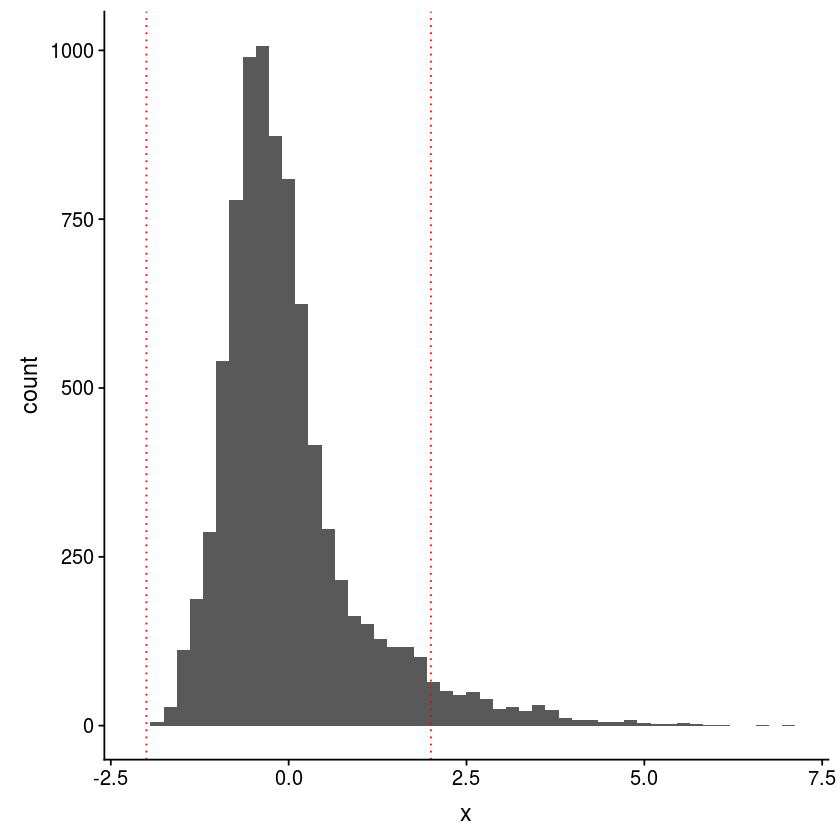

In [82]:
library(cowplot)
 
df <- data.frame(x = x_1)
ggplot(df, aes(x)) +
  geom_histogram(bins = 50) +
  geom_vline(xintercept = c(-2, 2), linetype = "dotted", color = 'red')

In [79]:
pData(my_cds)$UMI <- Matrix::colSums(exprs(my_cds))

In [80]:
head(pData(my_cds))

,barcode,Size_Factor,num_genes_expressed,UMI
AAACCTGAGCATCATC-1,AAACCTGAGCATCATC-1,0.5672842,871,2394
AAACCTGAGCTAACTC-1,AAACCTGAGCTAACTC-1,0.4014116,806,1694
AAACCTGAGCTAGTGG-1,AAACCTGAGCTAGTGG-1,1.0710628,1316,4520
AAACCTGCACATTAGC-1,AAACCTGCACATTAGC-1,0.6606467,898,2788
AAACCTGCACTGTTAG-1,AAACCTGCACTGTTAG-1,1.1058961,1526,4667
AAACCTGCATAGTAAG-1,AAACCTGCATAGTAAG-1,1.0521060,1495,4440


UMIとnGeneの相関を見る。

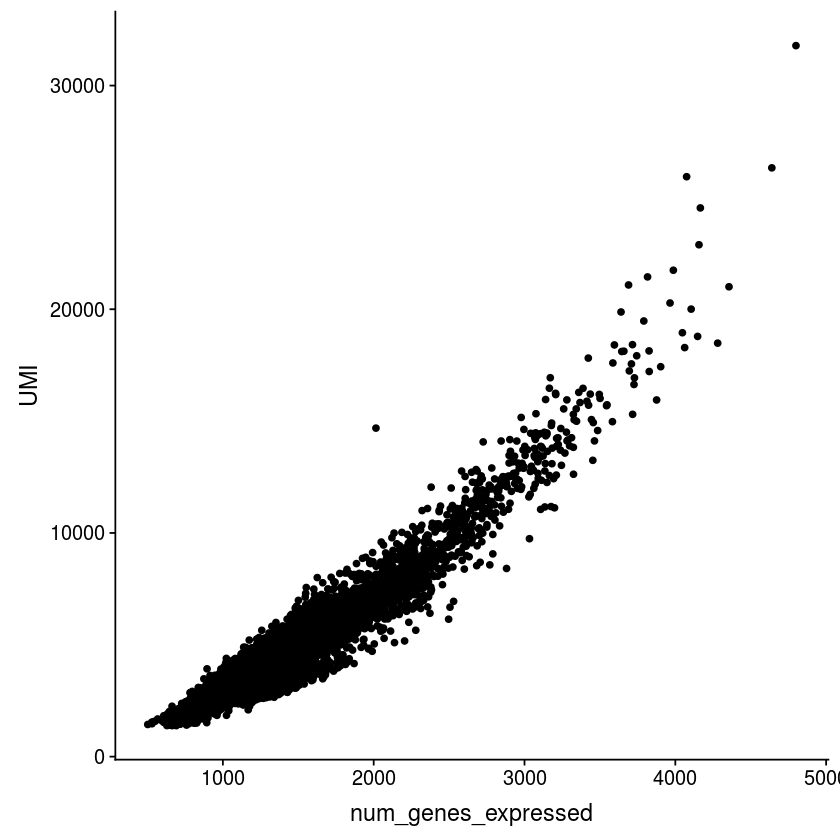

In [81]:
ggplot(pData(my_cds), aes(num_genes_expressed, UMI)) + geom_point()

nGeneやｎUMIが大きすぎる細胞は、通常doubletとして取り除く。